In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Function 1

In [2]:
# x will be a 2 dimensional array
def f(x):
    return np.square(np.linalg.norm(x))  # fn is x**2 + y**2

In [3]:
# 1st constraint
def c1(x):
    return 1 - x[0] - x[1] # 1 - x- y<=0

In [4]:
# 2nd constraint
def c2(x):
    return 1 + x[0] - x[1] # 1 + x - y<=0

In [5]:
# loss function 
# lambd are lagrange multipliers
def L(x, lambd): 
    C1 = np.maximum(0,c1(x))
    C2 = np.maximum(0,c2(x))
    return f(x) + lambd[0]*C1 + lambd[1]*C2

In [6]:
# will calculate gradient of func wrt to x (function must be real_valued)
# function must be differentiable
def gradient(x, func):
    dim = x.shape[0]
    eps = 1e-2
    grads = np.zeros((dim), dtype=np.float32)
    for i in range(dim):
        temp1 = np.copy(x)
        #print("temp1 = ",temp1)
        temp2 = np.copy(x)
        #print('temp2 = ',temp2)
        temp1[i] = temp1[i] + eps
        temp2[i] = temp2[i] - eps
        #print(temp1, temp2)
        grads[i] = (func(temp1) - func(temp2))/(2*eps)
        #print('grads = ',grads)
    return grads

In [7]:
def grad_lag(x, lambd):
    grad = np.zeros((x.shape[0]), dtype=np.float32)
    c_1 = (c1(x)>=0).astype(np.int32) # constraint 1
    #print("c_1 = ", 1 - c_1)          # c_1 = 1 means constraint 1 is active
    c_2 = (c2(x)>=0).astype(np.int32) # constraint 2
    #print("c_2 = ", 1 - c_2)          # c_2 = 1 means constraint 2 is active
    f_grad = gradient(x, func=f)      # gradient of f with respect to x
    #print("f_grad = ", f_grad)
    C1_grad = gradient(x, func=c1)    # gradient of c1 with respect to x
    #print("C1_grad = ", C1_grad)
    C2_grad = gradient(x, func=c2)    # gradient of c2 with respect to x
    #print("C2_grad = ", C2_grad)
    grad = f_grad + lambd[0]*(np.maximum(0,c_1))*C1_grad + lambd[1]*(np.maximum(0,c_2))*C2_grad
    #print("grad = ",grad)
    return grad

In [8]:
# working well
grad_lag(np.array([1,2], dtype=np.float32), lambd=[0,0])

array([1.9999504, 4.00002  ], dtype=float32)

L_value =  33.999996185302734  x =  [3. 5.]
L_value =  27.540048599243164  x =  [2.7000122 4.499998 ]
L_value =  22.307464599609375  x =  [2.4300175 4.0499973]
L_value =  18.069053649902344  x =  [2.1870213 3.6449957]
L_value =  14.6359281539917  x =  [1.9683247 3.2804918]
L_value =  11.855124473571777  x =  [1.7714958 2.9524446]
L_value =  9.602664947509766  x =  [1.5943484 2.6572013]
L_value =  7.821600437164307  x =  [1.4349155 2.3914814]
L_value =  6.430506467819214  x =  [1.2414258 2.2023344]
L_value =  5.303715467453003  x =  [1.0672824 2.0321035]
L_value =  4.3910112380981445  x =  [0.9105544 1.8788934]
L_value =  3.65171480178833  x =  [0.76949644 1.7410052 ]
L_value =  3.052889585494995  x =  [0.6425475 1.6169041]
L_value =  2.5678430795669556  x =  [0.5282937 1.505214 ]
L_value =  2.1749550104141235  x =  [0.425465  1.4046931]
L_value =  1.8567134141921997  x =  [0.33291864 1.3142234 ]
L_value =  1.5989381074905396  x =  [0.24962652 1.2328017 ]
L_value =  1.3901397287845612  

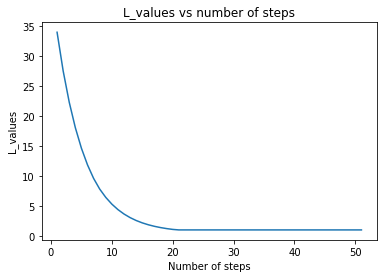

In [17]:
# minimization on the function f
# initializing x randomly
# any value of lambd>0 will affect the minimum points as it will then only affect L_value(loss), otherwise it will tend to find global minima
x_s = []
L_values = []
lambd = [1,1]
x = np.array([3,5],dtype= np.float32)
print("L_value = ",L(x, lambd)," x = ",x)
x_s.append(x)
L_values.append(L(x,lambd))
step_size = 5e-2
for i in range(50):
    grad = grad_lag(x, lambd)
    x = x - grad*step_size
    x_s.append(x)
    print("L_value = ",L(x, lambd)," x = ",x)
    L_values.append(L(x,lambd))
# visualizing L_values vs number of steps curve
plt.plot(range(1, 1 + len(L_values)), L_values)
plt.title("L_values vs number of steps")
plt.xlabel("Number of steps")
plt.ylabel("L_values")
plt.show()

## Function 2

In [22]:
def f(x):
    return (x[0] - 3)**2 + (x[1] + 2)**2  # function is (x-3)**2 + (y+2)**2

In [23]:
def c1(x):
    return x[0] # x<=0

In [24]:
def c2(x):
    return -x[1] # y>=0

L_value =  30.0  x =  [ 3. -2.]
L_value =  26.58000308990495  x =  [ 2.7000003 -1.7000003]
L_value =  23.809805283737774  x =  [ 2.4300005 -1.4300005]
L_value =  21.56594457408255  x =  [ 2.1870008 -1.1870008]
L_value =  19.748416935196833  x =  [ 1.9683009 -0.9683009]
L_value =  18.276218963446585  x =  [ 1.771471   -0.77147096]
L_value =  17.083738557758583  x =  [ 1.5943241  -0.59432405]
L_value =  16.11782898441512  x =  [ 1.4348918 -0.4348918]
L_value =  15.335442316388484  x =  [ 1.2914028  -0.29140276]
L_value =  14.70170889283328  x =  [ 1.1622627 -0.1622626]
L_value =  14.188384253073874  x =  [ 1.0460365 -0.0460363]
L_value =  14.1239955499315  x =  [0.94143295 0.05856735]
L_value =  14.034172793528665  x =  [ 0.84728974 -0.14728937]
L_value =  13.647679991693026  x =  [ 0.76256084 -0.03256039]
L_value =  13.758794902107448  x =  [0.6863048  0.07069568]
L_value =  13.672867266714736  x =  [ 0.6176744  -0.13637388]
L_value =  13.355022425747704  x =  [ 0.555907   -0.02273644]


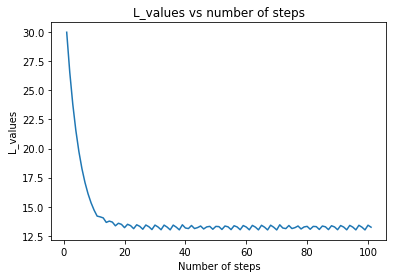

In [25]:
# minimization on the function f
# initializing x randomly
# any value of lambd>0 will affect the minimum points as it will then only affect L_value(loss), otherwise it will tend to find global minima
x_s = []
L_values = []
lambd = [6,6]
x = np.array([3,-2],dtype= np.float32)
print("L_value = ",L(x, lambd)," x = ",x)
x_s.append(x)
L_values.append(L(x,lambd))
step_size = 5e-2
for i in range(100):
    grad = grad_lag(x, lambd)
    x = x - grad*step_size
    x_s.append(x)
    print("L_value = ",L(x, lambd)," x = ",x)
    L_values.append(L(x,lambd))
# visualizing L_values vs number of steps curve
plt.plot(range(1, 1 + len(L_values)), L_values)
plt.title("L_values vs number of steps")
plt.xlabel("Number of steps")
plt.ylabel("L_values")
plt.show()

## Function 3

In [14]:
def f(x):
    return (x[0] - x[1])**2 - 4 # f(x) = (x-y)**2 - 4

In [15]:
def c1(x):
    return 1 - x[0] - x[1]

In [16]:
def c2(x):
    return x[0] + x[1] - 2

L_value =  1184.0  x =  [100. 100.]
L_value =  1180.396484375  x =  [99.69971 99.69971]
L_value =  1176.79296875  x =  [99.399414 99.399414]
L_value =  1173.189453125  x =  [99.09912 99.09912]
L_value =  1169.5859375  x =  [98.79883 98.79883]
L_value =  1165.982421875  x =  [98.498535 98.498535]
L_value =  1162.37890625  x =  [98.19824 98.19824]
L_value =  1158.775390625  x =  [97.89795 97.89795]
L_value =  1155.171875  x =  [97.59766 97.59766]
L_value =  1151.568359375  x =  [97.29736 97.29736]
L_value =  1147.96484375  x =  [96.99707 96.99707]
L_value =  1144.361328125  x =  [96.69678 96.69678]
L_value =  1140.7578125  x =  [96.396484 96.396484]
L_value =  1137.154296875  x =  [96.09619 96.09619]
L_value =  1133.55078125  x =  [95.7959 95.7959]
L_value =  1129.947265625  x =  [95.495605 95.495605]
L_value =  1126.34375  x =  [95.19531 95.19531]
L_value =  1122.740234375  x =  [94.89502 94.89502]
L_value =  1119.13671875  x =  [94.59473 94.59473]
L_value =  1115.533203125  x =  [94.29

L_value =  492.5205078125  x =  [42.37671 42.37671]
L_value =  488.9224853515625  x =  [42.076874 42.076874]
L_value =  485.324462890625  x =  [41.77704 41.77704]
L_value =  481.7264404296875  x =  [41.477203 41.477203]
L_value =  478.12841796875  x =  [41.17737 41.17737]
L_value =  474.5303955078125  x =  [40.877533 40.877533]
L_value =  470.932373046875  x =  [40.577698 40.577698]
L_value =  467.3343505859375  x =  [40.277863 40.277863]
L_value =  463.736328125  x =  [39.978027 39.978027]
L_value =  460.1383056640625  x =  [39.678192 39.678192]
L_value =  456.540283203125  x =  [39.378357 39.378357]
L_value =  452.9422607421875  x =  [39.07852 39.07852]
L_value =  449.34423828125  x =  [38.778687 38.778687]
L_value =  445.7462158203125  x =  [38.47885 38.47885]
L_value =  442.148193359375  x =  [38.179016 38.179016]
L_value =  438.5501708984375  x =  [37.87918 37.87918]
L_value =  434.9521484375  x =  [37.579346 37.579346]
L_value =  431.3541259765625  x =  [37.27951 37.27951]
L_valu

L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 

L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 

L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 0.97875834]
L_value =  -4.0  x =  [0.97875834 

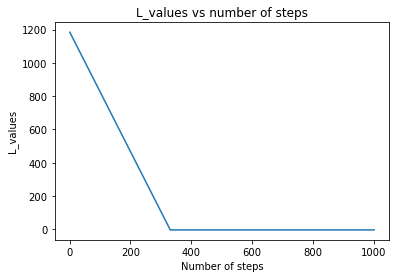

In [17]:
# minimization on the function f
# initializing x randomly
# any value of lambd>0 will affect the minimum points as it will then only affect L_value(loss), otherwise it will tend to find global minima
x_s = []
L_values = []
lambd = [6,6]
x = np.array([100,100],dtype= np.float32)
print("L_value = ",L(x, lambd)," x = ",x)
x_s.append(x)
L_values.append(L(x,lambd))
step_size = 5e-2
for i in range(1000):
    grad = grad_lag(x, lambd)
    x = x - grad*step_size
    x_s.append(x)
    print("L_value = ",L(x, lambd)," x = ",x)
    L_values.append(L(x,lambd))
# visualizing L_values vs number of steps curve
plt.plot(range(1, 1 + len(L_values)), L_values)
plt.title("L_values vs number of steps")
plt.xlabel("Number of steps")
plt.ylabel("L_values")
plt.show()

## Function 4

In [31]:
def f(x):
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2  # f(x) = (1-x)**2 + 100*(y-x**2)**2

In [32]:
def c1(x):
    return x[0] - 1 # x - 1<=0

In [33]:
def c2(x):
    return -x[0] - 2 # -x - 2<=0

L_value =  104.0  x =  [-1.  0.]
L_value =  94.17039024167691  x =  [-0.979798  0.01    ]
L_value =  85.56453101236858  x =  [-0.96098185  0.01950004]
L_value =  77.99191303927881  x =  [-0.94340956  0.0285399 ]
L_value =  71.29764695594615  x =  [-0.92695874  0.03715472]
L_value =  65.35475413445988  x =  [-0.91152316  0.0453757 ]
L_value =  60.058336352298426  x =  [-0.8970102   0.05323069]
L_value =  55.321071866588696  x =  [-0.8833385   0.06074465]
L_value =  51.069831300553695  x =  [-0.87043643  0.06794008]
L_value =  47.24298216895026  x =  [-0.85824054  0.07483727]
L_value =  43.788266790471155  x =  [-0.8466944   0.08145467]
L_value =  40.6611569698762  x =  [-0.83574766  0.08780904]
L_value =  37.82351803043128  x =  [-0.8253552   0.09391569]
L_value =  35.24255565982013  x =  [-0.8154765   0.09978864]
L_value =  32.889897311656995  x =  [-0.8060749   0.10544077]
L_value =  30.740960330092594  x =  [-0.79711753  0.11088393]
L_value =  28.774303860905707  x =  [-0.7885743   0

L_value =  2.3466984096644277  x =  [-0.53156334  0.285741  ]
L_value =  2.3463917281722453  x =  [-0.53144294  0.28570917]
L_value =  2.3460886391159876  x =  [-0.53132355  0.2856764 ]
L_value =  2.3457890466440565  x =  [-0.5312052   0.28564268]
L_value =  2.3454928384677394  x =  [-0.5310878   0.28560805]
L_value =  2.3451997901249895  x =  [-0.5309714   0.28557253]
L_value =  2.344909663879744  x =  [-0.5308559  0.2855361]
L_value =  2.3446225197653  x =  [-0.53074133  0.28549883]
L_value =  2.344338151357062  x =  [-0.53062767  0.2854607 ]
L_value =  2.3440564689309102  x =  [-0.5305149   0.28542176]
L_value =  2.3437772777705552  x =  [-0.53040296  0.285382  ]
L_value =  2.3435004964731383  x =  [-0.53029186  0.28534144]
L_value =  2.3432260955940967  x =  [-0.5301816   0.28530014]
L_value =  2.342953974451413  x =  [-0.53007215  0.28525805]
L_value =  2.342683956843538  x =  [-0.5299635   0.28521523]
L_value =  2.3424160000440803  x =  [-0.5298556  0.2851717]
L_value =  2.342149

L_value =  2.3092874465099333  x =  [-0.51778334  0.27559704]
L_value =  2.30906356351262  x =  [-0.5177082   0.27552205]
L_value =  2.308839631757365  x =  [-0.517633    0.27544704]
L_value =  2.3086157394634848  x =  [-0.5175579  0.275372 ]
L_value =  2.3083917982168596  x =  [-0.5174828   0.27529693]
L_value =  2.308167852721505  x =  [-0.5174077   0.27522185]
L_value =  2.307943946379157  x =  [-0.5173327   0.27514675]
L_value =  2.307719990866902  x =  [-0.51725763  0.27507162]
L_value =  2.307496074276456  x =  [-0.51718265  0.27499646]
L_value =  2.3072721083436023  x =  [-0.51710767  0.27492127]
L_value =  2.307048093010154  x =  [-0.5170327   0.27484605]
L_value =  2.3068241611562206  x =  [-0.51695776  0.27477083]
L_value =  2.3066001797690845  x =  [-0.51688284  0.27469558]
L_value =  2.306376148794399  x =  [-0.5168079  0.2746203]
L_value =  2.306152156194568  x =  [-0.51673305  0.27454498]
L_value =  2.3059281587659717  x =  [-0.5166582   0.27446967]
L_value =  2.305704111

L_value =  2.2760373267924177  x =  [-0.5067418   0.26438096]
L_value =  2.2758118035445056  x =  [-0.5066671   0.26430503]
L_value =  2.275586274508602  x =  [-0.50659233  0.2642291 ]
L_value =  2.275360739686055  x =  [-0.5065176   0.26415315]
L_value =  2.2751351990782873  x =  [-0.50644284  0.26407722]
L_value =  2.2749096526867962  x =  [-0.5063681   0.26400128]
L_value =  2.274684100513154  x =  [-0.50629336  0.26392534]
L_value =  2.2744585425590085  x =  [-0.5062186  0.2638494]
L_value =  2.2742330240771587  x =  [-0.50614387  0.2637735 ]
L_value =  2.2740074118759668  x =  [-0.50606906  0.2636976 ]
L_value =  2.273781793881511  x =  [-0.50599426  0.2636217 ]
L_value =  2.273556170095136  x =  [-0.50591946  0.26354578]
L_value =  2.2733305405182618  x =  [-0.50584465  0.26346987]
L_value =  2.273104905152384  x =  [-0.50576985  0.26339397]
L_value =  2.272879263999073  x =  [-0.50569504  0.26331806]
L_value =  2.272653617059974  x =  [-0.50562024  0.26324216]
L_value =  2.27242

L_value =  2.2309420176261527  x =  [-0.49173638  0.24933101]
L_value =  2.2307142674321043  x =  [-0.49166024  0.24925575]
L_value =  2.2304865114103696  x =  [-0.4915841   0.24918048]
L_value =  2.2302587719904334  x =  [-0.49150795  0.24910523]
L_value =  2.2300309819322703  x =  [-0.49143177  0.24902998]
L_value =  2.2298031860430885  x =  [-0.4913556   0.24895473]
L_value =  2.229575384325584  x =  [-0.49127942  0.24887948]
L_value =  2.2293475992046172  x =  [-0.49120325  0.24880424]
L_value =  2.2291197634265068  x =  [-0.49112704  0.248729  ]
L_value =  2.228891921816758  x =  [-0.49105084  0.24865377]
L_value =  2.228664096796731  x =  [-0.49097463  0.24857855]
L_value =  2.22843626594816  x =  [-0.49089843  0.24850333]
L_value =  2.2282083844235694  x =  [-0.4908222  0.2484281]
L_value =  2.227980497066723  x =  [-0.49074596  0.24835289]
L_value =  2.2277526262943534  x =  [-0.49066973  0.24827768]
L_value =  2.227524749692845  x =  [-0.4905935   0.24820247]
L_value =  2.2272

L_value =  2.188388665639405  x =  [-0.47744346  0.23540175]
L_value =  2.188158817543263  x =  [-0.47736588  0.23532726]
L_value =  2.1879289635882593  x =  [-0.4772883   0.23525277]
L_value =  2.1876991037775233  x =  [-0.47721073  0.23517828]
L_value =  2.187469260310282  x =  [-0.47713315  0.2351038 ]
L_value =  2.187239365304164  x =  [-0.47705555  0.23502932]
L_value =  2.1870094644396896  x =  [-0.47697794  0.23495485]
L_value =  2.1867795577200235  x =  [-0.47690034  0.23488037]
L_value =  2.186549667339183  x =  [-0.47682273  0.23480591]
L_value =  2.186319725400959  x =  [-0.4767451   0.23473145]
L_value =  2.186089777604953  x =  [-0.47666746  0.23465699]
L_value =  2.1858598461412164  x =  [-0.47658983  0.23458254]
L_value =  2.185629863103238  x =  [-0.47651216  0.2345081 ]
L_value =  2.185399874204865  x =  [-0.4764345   0.23443365]
L_value =  2.185169901632249  x =  [-0.47635683  0.23435922]
L_value =  2.1849399232029376  x =  [-0.47627917  0.23428479]
L_value =  2.18470

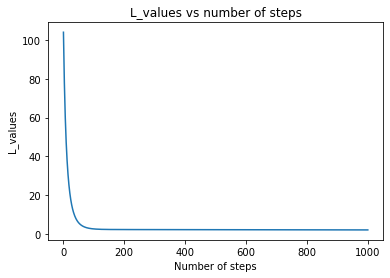

In [44]:
# minimization on the function f
# initializing x randomly
# any value of lambd>0 will affect the minimum points as it will then only affect L_value(loss), otherwise it will tend to find global minima
x_s = []
L_values = []
lambd = [1,1]
x = np.array([-1,0],dtype= np.float32)
print("L_value = ",L(x, lambd)," x = ",x)
x_s.append(x)
L_values.append(L(x,lambd))
step_size = 5e-5
for i in range(1000):
    grad = grad_lag(x, lambd)
    x = x - grad*step_size
    x_s.append(x)
    print("L_value = ",L(x, lambd)," x = ",x)
    L_values.append(L(x,lambd))
# visualizing L_values vs number of steps curve
plt.plot(range(1, 1 + len(L_values)), L_values)
plt.title("L_values vs number of steps")
plt.xlabel("Number of steps")
plt.ylabel("L_values")
plt.show()

## Function 5

In [1]:
def f(x):
    return 3*x[0]**2 + x[1]**2 + 2*x[0]*x[1] + x[0] + 6*x[1] + 2